In [1]:
# A Dense layered neural network is created to predict the type of Clothing in Fashion MNIST dataset

# Imports
import tensorflow_datasets as tfds
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
import logging
tf.get_logger().setLevel(logging.ERROR)

In [2]:
# Loading data and getting info about the dataset in metadata
# as_supervised = True returns dataset with labels
# with_info = True returns metadata
datasets,metadata = tfds.load("fashion_mnist",as_supervised=True,with_info = True)

In [3]:
# Separation into Train and Test dataset
mnist_train,mnist_test = datasets['train'],datasets['test']

In [4]:
# Labels
class_names = [
    "T-shirt/top","Trouser","PullOver","Dress","Coat","Sandal","Shirt","Sneaker","Bag","AnkleBoot"
]

In [5]:
# Number of training and testing examples can be taken from metadata
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [6]:
# Good practise to normalise data before training
# tf.cast converts the array values into 32-bit float values
def normalise(images,labels):
    images = tf.cast(images,tf.float32)
    images /= 255
    return images,labels

mnist_train = mnist_train.map(normalise)
mnist_test = mnist_test.map(normalise)

# Cache stores the data and helps in easy retrieval whenever required
mnist_train = mnist_train.cache()
mnist_test = mnist_test.cache()

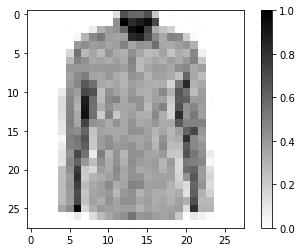

In [8]:
# Analysing the data
for image,label in mnist_test.take(1):
    break

image = image.numpy().reshape((28,28)) #Converts (28,28,1) to (28,28) -- 1 means GrayScale and 3 means RGB
plt.figure()
plt.imshow(image,cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

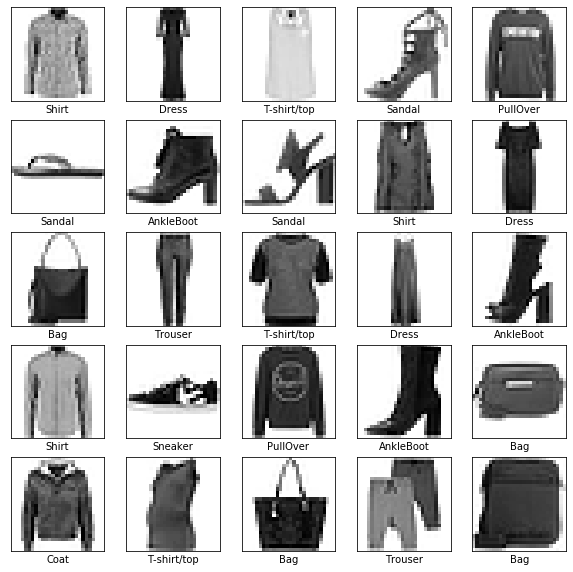

In [8]:
# Analysing diferent types of clothing with labels
plt.figure(figsize=(10,10))
i = 0
for (image,label) in mnist_test.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.imshow(image,cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[label])
    i += 1

In [9]:
# Creating model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #Flattens the array of corresponding input_shape
    tf.keras.layers.Dense(128,activation=tf.nn.relu),  #ReLU - Rectified Linear Unit
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)  #Softmax - Returns the Probability Distribution among 10 units
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [10]:
# Batches are created to increase training speed. 1 Batch of 32 images and labels
BATCH_SIZE = 32
mnist_train = mnist_train.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
mnist_test = mnist_test.batch(BATCH_SIZE)
model.fit(mnist_train,epochs=10,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4967 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3684 - accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3349 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3092 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2916 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2764 - accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2700 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2544 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2435 - accuracy: 0.9100
Epoch 10/10
1875/1875 [==============================] - 

In [11]:
# Testing the model
test_loss,test_accuracy = model.evaluate(mnist_test,steps = math.ceil(num_test_examples/BATCH_SIZE))
print(test_accuracy,test_loss)

313/313 [==============================] - 3s 10ms/step - loss: 0.3247 - accuracy: 0.8921
0.8921 0.32467735418305993


In [21]:
# Checking whether predicted and test labels are equal
for test_image,test_label in mnist_test.take(1):
    test_image = test_image.numpy()
    test_label = test_label.numpy()
    predictions = model.predict(test_image)
print(test_label[0],np.argmax(predictions[0]))

6 6


In [39]:
# Functions to help us visualise the performance of model 
def plot_images(i,predictions,labels,images):
    prediction,label,img = predictions[i],labels[i],images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[...,0],cmap = plt.cm.binary)
    predicted_label = np.argmax(prediction)
    
    if predicted_label == label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{}:Accuracy={:2.0f}({})".format(class_names[predicted_label],
                                               100*np.max(prediction),
                                               class_names[label],
                                               color = color))
    
def plot_value_array(i,predictions,labels):
    prediction,label = predictions[i],labels[i]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    bar_plot = plt.bar(range(10),prediction,color = "#777777")
    plt.ylim(0,1)
    predicted_label = np.argmax(prediction)
    
    bar_plot[predicted_label].set_color('red')
    bar_plot[label].set_color('blue')

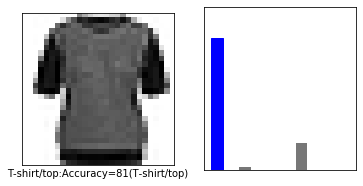

In [44]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i,predictions,test_label,test_image)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_label)

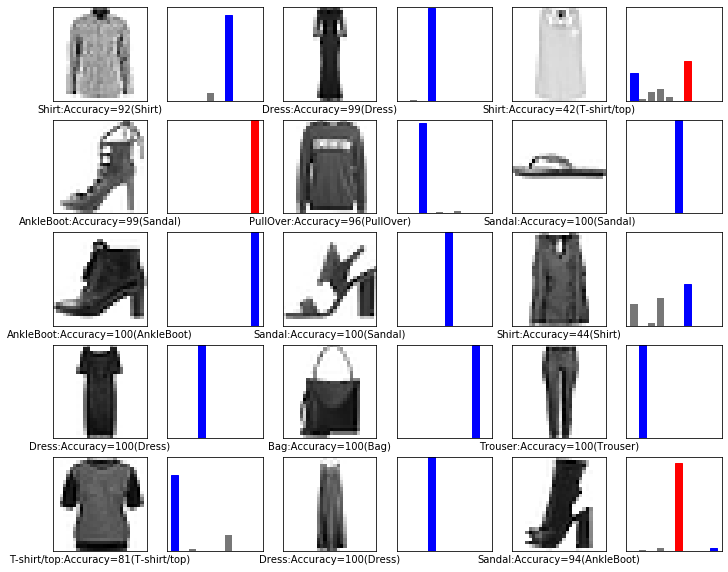

In [49]:
# Visualising performance of model
rows = 5
cols = 3
num_images = rows * cols
plt.figure(figsize=(2*2*cols,2*rows))
for i in range(num_images):
    plt.subplot(rows,2*cols,2*i+1)
    plot_images(i,predictions,test_label,test_image)
    plt.subplot(rows,2*cols,2*i+2)
    plot_value_array(i,predictions,test_label)

In [61]:
# Analysing the results
img = test_image[0]
print(img.shape)
img = np.array([img])
print(img.shape)
pred = model.predict(img)
print(np.argmax(pred),class_names[np.argmax(pred)],pred.max()*100,'%')

(28, 28, 1)
(1, 28, 28, 1)
6 Shirt 91.60662293434143 %
